In [167]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [168]:
# Set the figure size.
sns.set(rc={'figure.figsize':(12, 8)})

# Set the plot style as white.
sns.set_style('white')

In [2]:
# Using Excel: create copy of Spend column: Spend_new. many of Spend_new values are times or dates. 
# So I changed data type of Spend2 column into number. But that still leaves 402 rows with timestamp data

In [170]:
# Import modified dataset
df_creative = pd.read_excel('Change 2022 Creative Data writeback_091122_altered.xlsx')
df_creative

,Requested URL Path,Campaign,Ad Format,Clicks,Spend,Creative - Size,Date,Impressions,Reach,Audience,...,Creative - Version,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend_new
0,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.26,NaN,2022-05-19,119,63.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.26
1,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.15,NaN,2022-05-19,9,8.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.15
2,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.38,NaN,2022-05-19,26,17.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.38
3,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.19,NaN,2022-05-19,12,10.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.19
4,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,1.0,3.62,NaN,2022-05-19,247,150.0,1,...,EarlyBird,NaN,NaN,NaN,165,0,0.004049,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,NaN,ESPN,TV,NaN,0.1,NaN,2022-05-01,3,3.0,General Targetting,...,15s,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.1
102064,NaN,MTV,TV,NaN,0.17,NaN,2022-05-01,5,5.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.17
102065,NaN,Food Network,TV,NaN,0.14,NaN,2022-05-01,4,4.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.14
102066,NaN,Nat Geo TV,TV,NaN,0.58,NaN,2022-05-01,17,16.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.58


In [171]:
# Confirm data type of Spend2 is float. Also check for null values.
print(df_creative.shape)
print(df_creative.dtypes)
print(df_creative.info())

(102068, 22)
Requested URL Path                 object
Campaign                           object
Ad Format                          object
Clicks                            float64
Spend                              object
Creative - Size                    object
Date                       datetime64[ns]
Impressions                         int64
Reach                             float64
Audience                           object
Platform                           object
Creative - Family                  object
Creative - Version                 object
100% Video Views                  float64
Video Starts                      float64
Follows                           float64
Days away from max date             int64
Latest report?                      int64
CTR                               float64
CTR Score                         float64
Weighted CTR Score                float64
Spend_new                          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [172]:
# Make a copy of the dataframe before cleaning
df = df_creative.copy()
df

,Requested URL Path,Campaign,Ad Format,Clicks,Spend,Creative - Size,Date,Impressions,Reach,Audience,...,Creative - Version,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend_new
0,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.26,NaN,2022-05-19,119,63.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.26
1,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.15,NaN,2022-05-19,9,8.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.15
2,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.38,NaN,2022-05-19,26,17.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.38
3,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.19,NaN,2022-05-19,12,10.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.19
4,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,1.0,3.62,NaN,2022-05-19,247,150.0,1,...,EarlyBird,NaN,NaN,NaN,165,0,0.004049,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,NaN,ESPN,TV,NaN,0.1,NaN,2022-05-01,3,3.0,General Targetting,...,15s,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.1
102064,NaN,MTV,TV,NaN,0.17,NaN,2022-05-01,5,5.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.17
102065,NaN,Food Network,TV,NaN,0.14,NaN,2022-05-01,4,4.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.14
102066,NaN,Nat Geo TV,TV,NaN,0.58,NaN,2022-05-01,17,16.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.58


In [173]:
# Drop unnecessary columns : 'Requested URL Path', 'Spend', 'Days away from max date', 'Latest report?'
df.drop(['Requested URL Path', 'Spend', 'Days away from max date', 'Latest report?'], axis = 1, inplace=True)

# View the dataframe
df.head()

,Campaign,Ad Format,Clicks,Creative - Size,Date,Impressions,Reach,Audience,Platform,Creative - Family,Creative - Version,100% Video Views,Video Starts,Follows,CTR,CTR Score,Weighted CTR Score,Spend_new
0,FY22,Single image,0.0,NaN,2022-05-19,119,63.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.26
1,FY22,Single image,0.0,NaN,2022-05-19,9,8.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.15
2,FY22,Single image,0.0,NaN,2022-05-19,26,17.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.38
3,FY22,Single image,0.0,NaN,2022-05-19,12,10.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.19
4,FY22,Single image,1.0,NaN,2022-05-19,247,150.0,1,Facebook,CloserTwins,EarlyBird,NaN,NaN,NaN,0.004049,NaN,NaN,3.62


In [174]:
# Rename columns

df.rename({'Ad Format' : 'Ad_Format',
           'Creative - Family': 'Creative_Family',
           'Creative - Version': 'Creative_Version',
           '100% Video Views': '100%_Video_Views',
           'Video Starts': 'Video_Starts',
           'CTR Score': 'CTR_Score', 'Weighted CTR Score':'Weighted_CTR_Score',
           'Spend_new' : 'Spend'}, axis=1, inplace=True)

In [176]:
# Change datatype of 'Spend' to float
df['Spend'] = pd.to_numeric(df['Spend'], errors='coerce')
df['Spend'].dtype

dtype('float64')

In [177]:
print(df['Spend'].isnull().sum())

# Drop the rows with na in 'Spend'
df.dropna(subset=['Spend'], inplace=True)

402


In [178]:
df.drop(['Creative - Size'], axis=1, inplace =True)

In [179]:
# Determine the number of missing values
df.isnull().sum()

Campaign                 72
Ad_Format                71
Clicks                11877
Date                      0
Impressions               0
Reach                 21237
Audience                 41
Platform                  0
Creative_Family         883
Creative_Version        525
100%_Video_Views      77230
Video_Starts          76217
Follows               93266
CTR                   12829
CTR_Score             27050
Weighted_CTR_Score    27050
Spend                     0
dtype: int64

In [180]:
# Percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

Follows               91.737651
100%_Video_Views      75.964433
Video_Starts          74.968033
Weighted_CTR_Score    26.606732
CTR_Score             26.606732
Reach                 20.888989
CTR                   12.618771
Clicks                11.682372
Creative_Family        0.868530
Creative_Version       0.516397
Campaign               0.070820
Ad_Format              0.069837
Audience               0.040328
Platform               0.000000
Impressions            0.000000
Date                   0.000000
Spend                  0.000000
dtype: float64

In [181]:
len(df['Clicks'].loc[df['Platform']=='OTT'])

11877

In [182]:
df['Clicks'].isna().sum()

11877

In [183]:
# Use fillna() to replace NaN with 0 for 'Clicks', 'Reach','100%_Video_Views','Video_Starts', 'Follows', 'CTR',
# 'CTR_Score', 'Weighted_CTR_Score'
#df[['Clicks', 'Reach','100%_Video_Views','Video_Starts','Follows','CTR','CTR_Score','Weighted_CTR_Score']] = df[['Clicks', 'Reach', 'Follows']].fillna(0)

cols = ['Clicks','Reach','100%_Video_Views','Video_Starts','Follows', 'CTR', 'CTR_Score', 'Weighted_CTR_Score']
df[cols] = df[cols].fillna(0)

In [184]:
# Check sum of missing values in the dataframe
df.isna().sum().sort_values(ascending=False)

Creative_Family       883
Creative_Version      525
Campaign               72
Ad_Format              71
Audience               41
Date                    0
Impressions             0
Reach                   0
Platform                0
Clicks                  0
100%_Video_Views        0
Video_Starts            0
Follows                 0
CTR                     0
CTR_Score               0
Weighted_CTR_Score      0
Spend                   0
dtype: int64

In [185]:
df['Creative_Family'].fillna('No Answer', inplace=True)
df['Creative_Version'].fillna('No Answer', inplace=True)
df['Campaign'].fillna('No Answer', inplace=True)
df['Ad_Format'].fillna('No Answer', inplace=True)
df['Audience'].fillna('No Answer', inplace=True)

In [186]:
# Determine sum of missing values
df.isna().sum()

Campaign              0
Ad_Format             0
Clicks                0
Date                  0
Impressions           0
Reach                 0
Audience              0
Platform              0
Creative_Family       0
Creative_Version      0
100%_Video_Views      0
Video_Starts          0
Follows               0
CTR                   0
CTR_Score             0
Weighted_CTR_Score    0
Spend                 0
dtype: int64

In [187]:
df.dtypes

Campaign                      object
Ad_Format                     object
Clicks                       float64
Date                  datetime64[ns]
Impressions                    int64
Reach                        float64
Audience                      object
Platform                      object
Creative_Family               object
Creative_Version              object
100%_Video_Views             float64
Video_Starts                 float64
Follows                      float64
CTR                          float64
CTR_Score                    float64
Weighted_CTR_Score           float64
Spend                        float64
dtype: object

In [188]:
# Change datatypes from float to int for 'Clicks','Reach', '100%_Video_Views', 'Video_Starts', 'Follows' as these are integer values
cols = ['Clicks','Reach','100%_Video_Views','Video_Starts','Follows'] 
df[cols] = df[cols].astype(int)
df.dtypes

Campaign                      object
Ad_Format                     object
Clicks                         int64
Date                  datetime64[ns]
Impressions                    int64
Reach                          int64
Audience                      object
Platform                      object
Creative_Family               object
Creative_Version              object
100%_Video_Views               int64
Video_Starts                   int64
Follows                        int64
CTR                          float64
CTR_Score                    float64
Weighted_CTR_Score           float64
Spend                        float64
dtype: object

In [189]:
# Determine types of Ad_Formats
df['Ad_Format'].unique()
df['Ad_Format'].value_counts()

Display                  45183
Native                   15283
CPC                       8613
Single image              7878
Video                     7161
TV                        6806
MOBILE                    2776
Audio                     2488
TABLET                    1912
Display - Interactive     1459
Carousel                  1334
DESKTOP                    383
Follower ads               291
No Answer                   71
No lock campaign            28
Name: Ad_Format, dtype: int64

In [190]:
# Ad_Format = No lock campaign is invalid. 
# The corresponding 'Creative_Family' are invalid data and changed to 'Other'
df.loc[df['Ad_Format']== 'No lock campaign', 'Creative_Family'] = 'Other'

In [191]:
# Ad_Format= 'No lock campaign' checked against Campaign to replace with correct ad format. 
df.loc[df['Campaign'].str.contains(pat='No Lock Campaign - Carousel'), 'Ad_Format'] = 'Carousel'
df.loc[df['Campaign'].str.contains(pat='No Lock Campaign - Single DSC'), 'Ad_Format'] = 'Single image'
df.drop(df[df['Ad_Format'] == 'No lock campaign'].index, inplace=True)

In [192]:
#Types of 'Ad_Formats'
df['Ad_Format'].value_counts()

Display                  45183
Native                   15283
CPC                       8613
Single image              7889
Video                     7161
TV                        6806
MOBILE                    2776
Audio                     2488
TABLET                    1912
Display - Interactive     1459
Carousel                  1349
DESKTOP                    383
Follower ads               291
No Answer                   71
Name: Ad_Format, dtype: int64

In [193]:
df['Audience'].value_counts()

General Targetting    21681
4                     20574
1                     16472
3                     15996
5                     14339
2                     12559
No Answer                41
Domain Targeting          2
Name: Audience, dtype: int64

In [194]:
df.loc[df['Audience'] == 'Domain Targeting']

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend
62337,Domain Targeting - No Lock Campaign - Single D...,Single image,42,2022-09-06,8130,0,Domain Targeting,LinkedIn,Other,No Answer,0,0,0,0.005166,1.5,12195.0,1914.60
62451,Domain Targeting - No Lock Campaign - Carousel...,Carousel,4,2022-09-06,665,0,Domain Targeting,LinkedIn,Other,No Answer,0,0,0,0.006015,1.5,997.5,146.83


In [195]:
# Create new column Target_Group and assign Audience as per target group
audience_dict ={'1':'1', '2':'1', '3':'1',
               '4':'2', '5':'2',
               'General Targetting':'3'}
 
# Add a new column named 'Target_Group'
df['Target_Group'] = df['Audience'].map(audience_dict)

In [196]:
# Count of different target groups across the data
df['Target_Group'].value_counts()

1    45027
2    34913
3    21681
Name: Target_Group, dtype: int64

In [17]:
# Round the below columns to 2 decmial places for consistency 
# Also: Spend logically can't be more than 2 decimal places.
#decimals = 2
#creative_cleaned4['Spend2'] = creative_cleaned4['Spend2'].apply(lambda x: round(x, decimals))
#creative_cleaned4['CTR'] = creative_cleaned4['CTR'].apply(lambda x: round(x, decimals))
#creative_cleaned4['CTR Score'] = creative_cleaned4['CTR Score'].apply(lambda x: round(x, decimals))
#creative_cleaned4['Weighted CTR Score'] = creative_cleaned4['Weighted CTR Score'].apply(lambda x: round(x, decimals))
#creative_cleaned4.describe()

/var/folders/m8/m93lgb1j2yz0fn6znljsmml80000gn/T/ipykernel_67389/1373136962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creative_cleaned4['Spend2'] = creative_cleaned4['Spend2'].apply(lambda x: round(x, decimals))
/var/folders/m8/m93lgb1j2yz0fn6znljsmml80000gn/T/ipykernel_67389/1373136962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creative_cleaned4['CTR'] = creative_cleaned4['CTR'].apply(lambda x: round(x, decimals))
/var/folders/m8/m93lgb1j2yz0fn6znljsmml80000gn/T/ipykernel_67389/137313696

,Clicks,Impressions,Reach,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend2
count,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000,93051.000000
mean,0.585356,505.064169,157.962247,26.437663,40.969780,0.005169,109.975003,0.048866,0.002101,0.515121,266.502993,7.787150
std,2.321076,1620.017822,557.469217,235.972957,354.391018,0.148158,61.769383,0.215588,0.014853,0.402394,904.325837,42.395824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,2.000000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.500000,1.500000,0.150000
50%,0.000000,70.000000,11.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,0.500000,20.500000,0.700000
75%,0.000000,327.000000,72.000000,0.000000,0.000000,0.000000,165.000000,0.000000,0.000000,0.500000,164.500000,3.590000
max,113.000000,59784.000000,16601.000000,14173.000000,19635.000000,11.000000,219.000000,1.000000,1.000000,1.500000,40845.000000,2706.460000


In [197]:
df

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group
0,FY22,Single image,0,2022-05-19,119,63,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.26,1
1,FY22,Single image,0,2022-05-19,9,8,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.15,1
2,FY22,Single image,0,2022-05-19,26,17,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.38,1
3,FY22,Single image,0,2022-05-19,12,10,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.19,1
4,FY22,Single image,1,2022-05-19,247,150,1,Facebook,CloserTwins,EarlyBird,0,0,0,0.004049,0.0,0.0,3.62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,0,0,0,0.000000,0.0,0.0,0.10,3
102064,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.17,3
102065,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.14,3
102066,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.58,3


<AxesSubplot:xlabel='Weighted_CTR_Score', ylabel='Platform'>

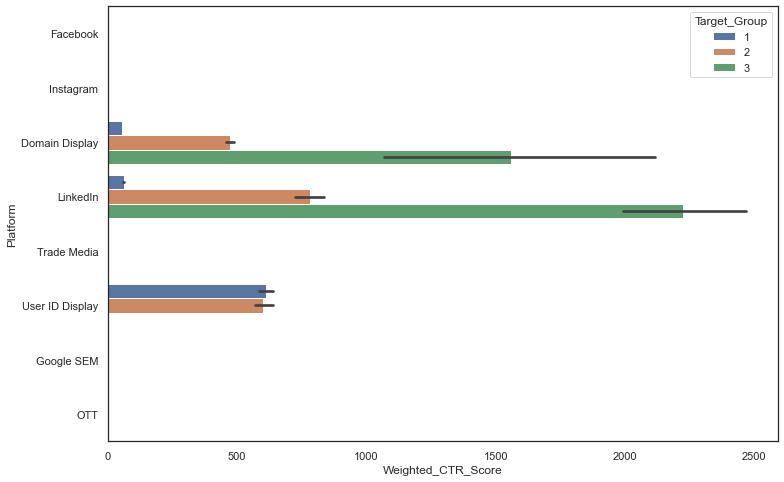

In [199]:
sns.barplot(data=df, x='Weighted_CTR_Score', y='Platform', 
            hue='Target_Group', estimator = np.mean)

<AxesSubplot:xlabel='Spend', ylabel='Weighted_CTR_Score'>

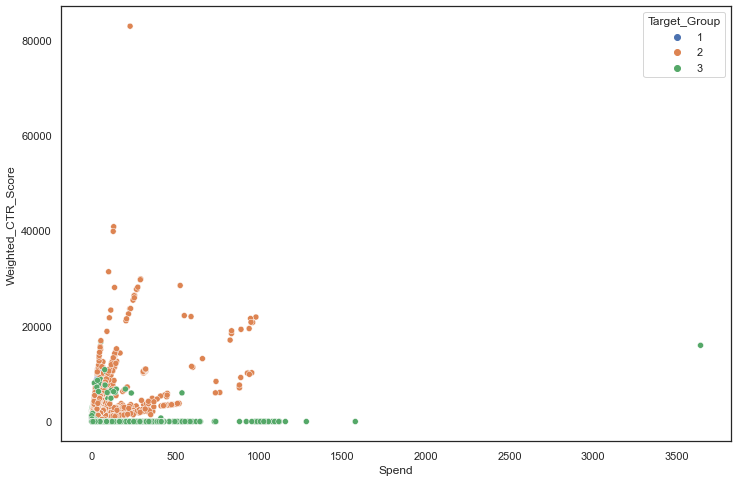

In [200]:
sns.scatterplot(data=df, x="Spend", y="Weighted_CTR_Score", hue='Target_Group')

<AxesSubplot:xlabel='Spend', ylabel='Weighted_CTR_Score'>

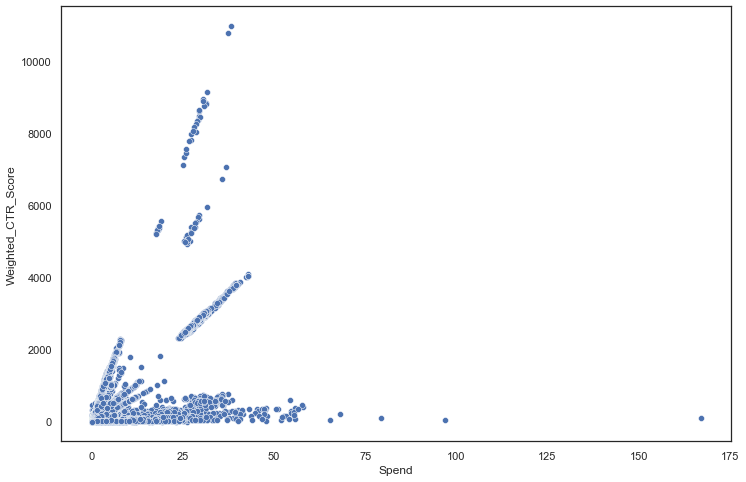

In [202]:
sns.scatterplot(data=df[df['Target_Group'] == '1'], 
                x="Spend", y="Weighted_CTR_Score")

In [203]:
from datetime import datetime

In [204]:
df['month'] = df['Date'].dt.month
df

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group,month
0,FY22,Single image,0,2022-05-19,119,63,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.26,1,5
1,FY22,Single image,0,2022-05-19,9,8,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.15,1,5
2,FY22,Single image,0,2022-05-19,26,17,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.38,1,5
3,FY22,Single image,0,2022-05-19,12,10,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.19,1,5
4,FY22,Single image,1,2022-05-19,247,150,1,Facebook,CloserTwins,EarlyBird,0,0,0,0.004049,0.0,0.0,3.62,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,0,0,0,0.000000,0.0,0.0,0.10,3,5
102064,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.17,3,5
102065,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.14,3,5
102066,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.58,3,5


In [205]:
clicks_per_month = df.groupby(['month', 'Target_Group'])[['Clicks']].sum().reset_index()
clicks_per_month

,month,Target_Group,Clicks
0,3,3,0
1,4,1,493
2,4,2,782
3,4,3,2931
4,5,1,1548
5,5,2,4801
6,5,3,1917
7,6,1,882
8,6,2,5055
9,6,3,2151


In [206]:
spend_per_month = df.groupby(['month', 'Target_Group'])[['Spend']].sum().reset_index()
spend_per_month

,month,Target_Group,Spend
0,3,3,41965.930000
1,4,1,7077.032468
2,4,2,10712.108922
3,4,3,213218.127592
4,5,1,22866.503784
5,5,2,48142.288165
6,5,3,1707.340000
7,6,1,10588.731143
8,6,2,36270.224384
9,6,3,1782.021121


<AxesSubplot:xlabel='month', ylabel='Clicks'>

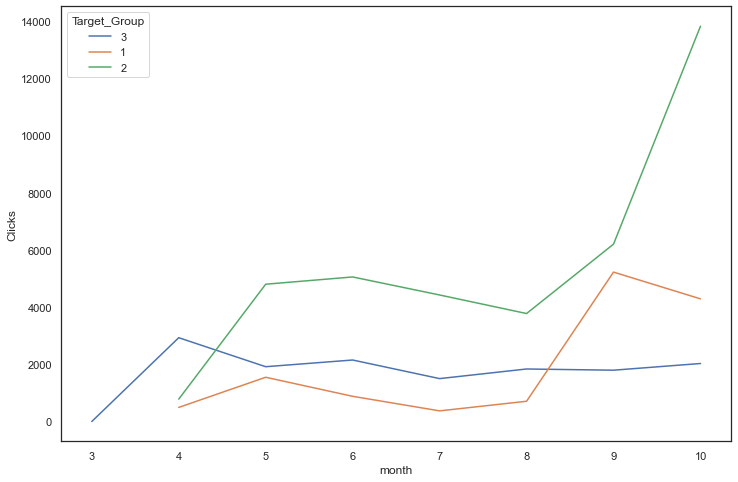

In [207]:
sns.lineplot(x = 'month', y = 'Clicks', hue = 'Target_Group', 
             data = clicks_per_month, ci = None)

<AxesSubplot:xlabel='month', ylabel='Spend'>

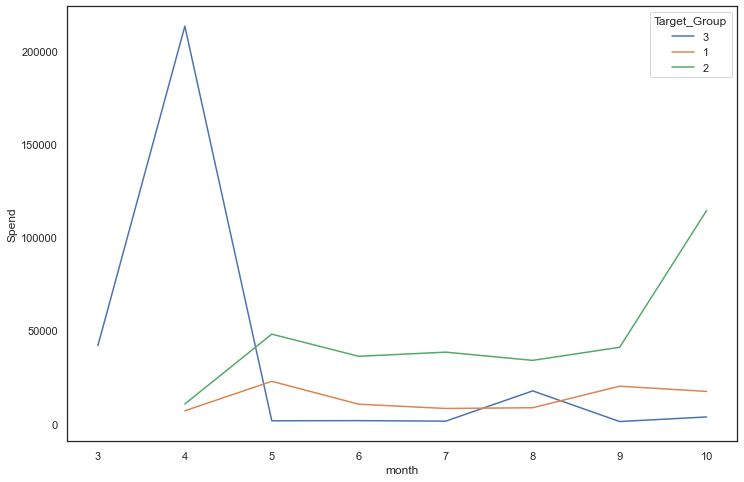

In [208]:
sns.lineplot(x = 'month', y = 'Spend', hue = 'Target_Group', 
             data = spend_per_month, ci = None)

In [211]:
video = df[(df['Ad_Format'] == 'Video') 
           & (df['100%_Video_Views'] > 0)]
video

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group,month
13,FY22,Video,0,2022-05-19,72,61,1,Facebook,CloserTwins,Faceoff1,1,39,0,0.000000,0.0,0.0,1.510000,1,5
15,FY22,Video,2,2022-05-19,108,84,1,Facebook,CloserTwins,Faceoff2,1,77,0,0.018519,0.0,0.0,3.100000,1,5
16,FY22,Video,0,2022-05-19,19,17,1,Instagram,CloserTwins,Faceoff2,1,18,0,0.000000,0.0,0.0,0.740000,1,5
19,FY22,Video,0,2022-05-19,144,112,1,Facebook,CloserTwins,Cutdown1B,5,114,0,0.000000,0.0,0.0,4.510000,1,5
35,FY22,Video,0,2022-05-19,46,40,2,Facebook,CloserTwins,Cutdown1B,1,35,0,0.000000,0.0,0.0,1.700000,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99404,4 - StackAdapt - Display - Video,Video,0,2022-10-11,1159,56,4,Domain Display,CloserTwins,Cutdown1B,836,1099,0,0.000000,0.5,579.5,17.041875,2,10
99405,4 - StackAdapt - Display - Video,Video,0,2022-10-11,1084,67,4,Domain Display,CloserTwins,Faceoff,737,1006,0,0.000000,0.5,542.0,15.930648,2,10
99467,5 - StackAdapt - Remarketing - Video,Video,0,2022-10-11,2387,170,5,Domain Display,CloserTwins,Cutdown1A,1035,2175,0,0.000000,0.5,1193.5,34.943553,2,10
99468,5 - StackAdapt - Remarketing - Video,Video,0,2022-10-11,2571,161,5,Domain Display,CloserTwins,Cutdown1B,1722,2376,0,0.000000,0.5,1285.5,37.649803,2,10


<AxesSubplot:xlabel='100%_Video_Views', ylabel='Count'>

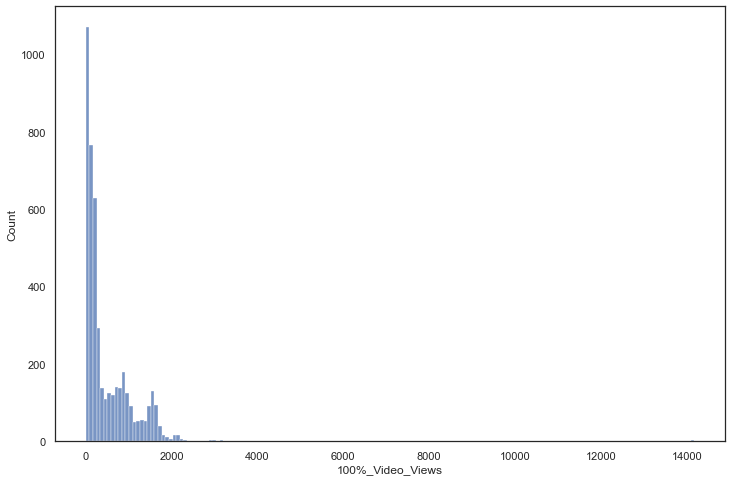

In [212]:
sns.histplot(data=video, x='100%_Video_Views')

In [213]:
video.groupby('Target_Group')[['100%_Video_Views']].sum().reset_index()

,Target_Group,100%_Video_Views
0,1,488538
1,2,1971513


<AxesSubplot:xlabel='Target_Group', ylabel='100%_Video_Views'>

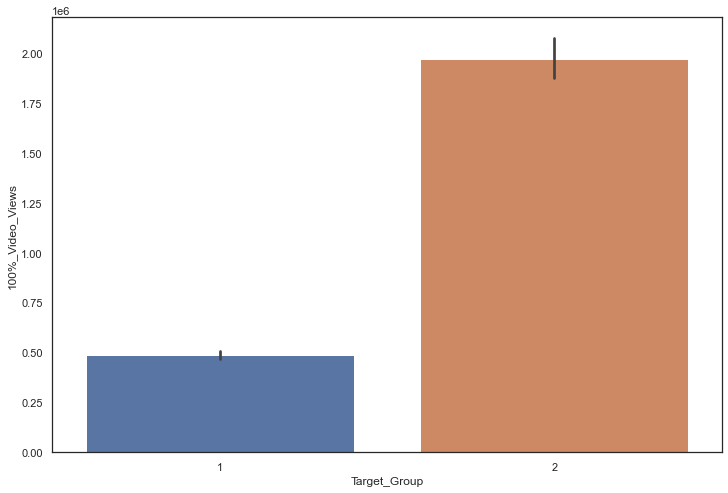

In [225]:
sns.barplot(x='Target_Group', y='100%_Video_Views', data=video, estimator=sum)

In [214]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [217]:
df1 = df[df['Target_Group'] == '1']
df2 = df[df['Target_Group'] == '2']
df3 = df[df['Target_Group'] == '3']

In [221]:
x1 = df1['Spend']

y1 = df1['Weighted_CTR_Score']

f1 = 'y1 ~ x1'
test1 = ols(f1, data = df1).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                 2.733e+04
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:48:55   Log-Likelihood:            -3.2654e+05
No. Observations:               45027   AIC:                         6.531e+05
Df Residuals:                   45025   BIC:                         6.531e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0352      1.737      7.506      0.000       9.631      16.439
x1            51.0987      0.309    165.310      0.000      50.493      51.705
==============================================================================
Omnibus:                    55052.852   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33998409.580
Skew:                           6.046   Prob(JB):                         0.00
Kurtosis:                     137.072   Cond. No.                         6.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
x2 = df2['Spend']

y2 = df2['Weighted_CTR_Score']

f2 = 'y2 ~ x2'
test2 = ols(f2, data = df2).fit()
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                 1.580e+04
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:49:18   Log-Likelihood:            -2.9475e+05
No. Observations:               34913   AIC:                         5.895e+05
Df Residuals:                   34911   BIC:                         5.895e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    316.9733      6.234     50.845      0.000     304.754     329.192
x2            22.5219      0.179    125.690      0.000      22.171      22.873
==============================================================================
Omnibus:                    71472.975   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        938930173.555
Skew:                          16.610   Prob(JB):                         0.00
Kurtosis:                     805.707   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
x3 = df3['Spend']

y3 = df3['Weighted_CTR_Score']

f3 = 'y3 ~ x3'
test3 = ols(f3, data = df3).fit()
test3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     549.1
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          6.13e-120
Time:                        13:49:39   Log-Likelihood:            -1.6132e+05
No. Observations:               21681   AIC:                         3.226e+05
Df Residuals:                   21679   BIC:                         3.227e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8609      2.867      8.670      0.000      19.241      30.481
x3             1.1072      0.047     23.433      0.000       1.015       1.200
==============================================================================
Omnibus:                    42367.369   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        106318912.488
Skew:                          15.629   Prob(JB):                         0.00
Kurtosis:                     344.634   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""